<a href="https://colab.research.google.com/github/MuhammadBayuNugroho/analisis-sentimen-artikel/blob/main/Baru_of_05_FIKS_EDA_Dataset_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA DATASET YANG TELAH DI BERSIHKAN**

## 1. Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# 1. Membaca Dataset
# Pastikan mengganti 'dataset_cleaned.csv' dengan nama file dataset Anda.
dataset_path = '/content/drive/MyDrive/Dataset Analisis Sentimen/Baru - Hasil EDA Preprocessing 2.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# ubah nama kolom sentimen
data.rename(columns={'Revised_Sentiment': 'Sentiment'}, inplace=True)

In [ ]:
data.head(10)

,Cleaned Comment,Sentiment
0,baterai mahal mending beli,negative
1,subsidi mobil listrik orng kaya guys klau emis...,neutral
2,hemat listrik mobil pakai panel sorya solosinya,positive
3,mudah cipta mesin batas listrik,negative
4,regulasi safetynya gak bahas parkir garasi rum...,positive
5,erti perintah tukar mosin dg mol harga masuk a...,negative
6,susah jalan mobil listrik cocok terap indonesi...,positive
7,fikirin solusi dasar bahan bakar emg listrik b...,negative
8,mobil listerik mahal ketimbang mobil bbm jawab...,negative
9,darimana mobil listrik ramah lingkungankalo mo...,positive


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:

# 2. Menampilkan Informasi Awal Dataset
print("Informasi dataset:")
print(data.info())
print("\nStatistik deskriptif dataset:")
print(data.describe(include='all'))


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cleaned Comment    1711 non-null   object
 1   Revised_Sentiment  1711 non-null   object
dtypes: object(2)
memory usage: 26.9+ KB
None

Statistik deskriptif dataset:
       Cleaned Comment Revised_Sentiment
count             1711              1711
unique            1706                 3
top        keren mobil          positive
freq                 2              1013



Distribusi sentimen:
Revised_Sentiment
positive    1013
negative     488
neutral      210
Name: count, dtype: int64


<ipython-input-4-15c9229b65db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revised_Sentiment', data=data, palette='viridis')


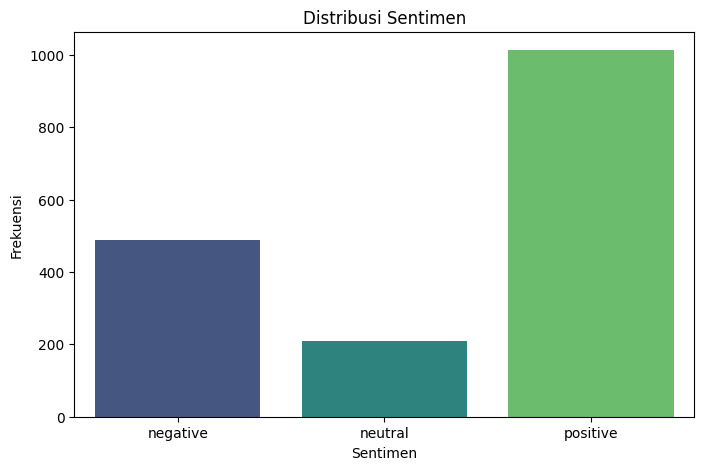

In [ ]:
# 3. Distribusi Sentimen
# Melihat jumlah data per kategori sentimen
print("\nDistribusi sentimen:")
print(data['Revised_Sentiment'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Revised_Sentiment', data=data, palette='viridis')
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Frekuensi")
plt.show()

## 2. Panjang Komentar Setelah Preprocessing

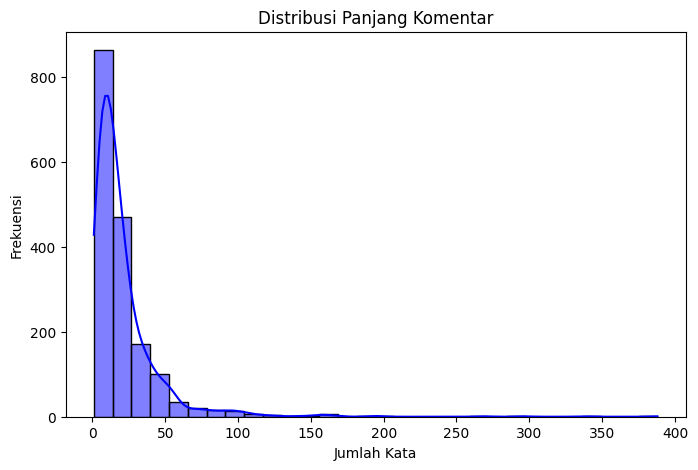

In [ ]:
# 4. Panjang Komentar yang Dibersihkan
# Menghitung panjang komentar (dalam jumlah kata)
data['Comment Length'] = data['Cleaned Comment'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(data['Comment Length'], bins=30, kde=True, color='blue')
plt.title("Distribusi Panjang Komentar")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()


## 3. Worldcloud Sentimen

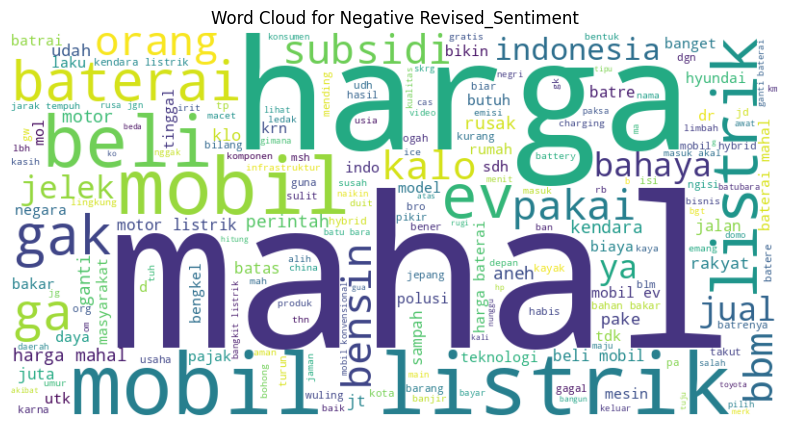

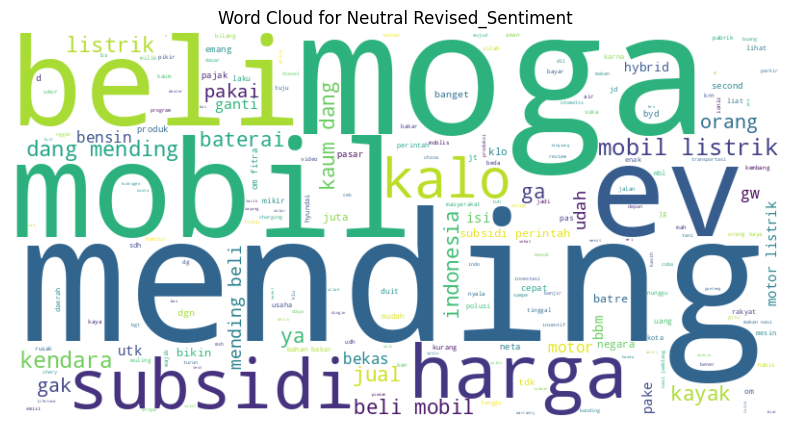

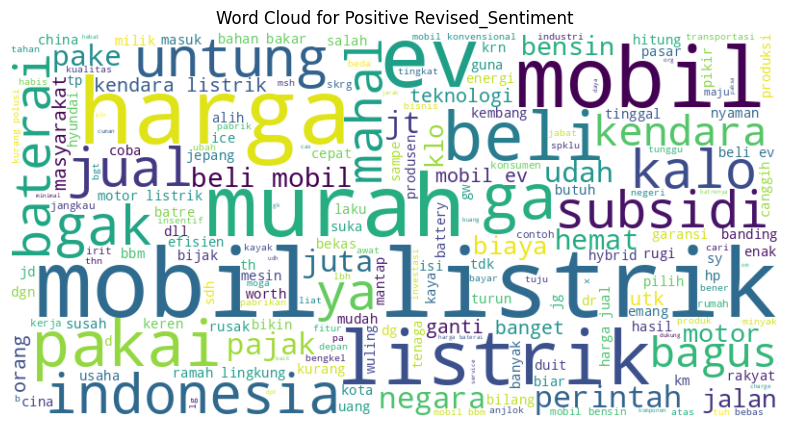

In [ ]:

# Tokenize words in comments
data['Tokenized Words'] = data['Cleaned Comment'].apply(lambda x: x.split())

# Combine all words for each sentiment
sentiment_words = data.groupby('Revised_Sentiment')['Tokenized Words'].sum()

# Generate word clouds for each sentiment
for sentiment, words in sentiment_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Revised_Sentiment')
    plt.axis('off')
    plt.show()

## 4. Analisis Kata Paling Umum

<ipython-input-7-f482a4989a53>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=common_words_df, palette='viridis')


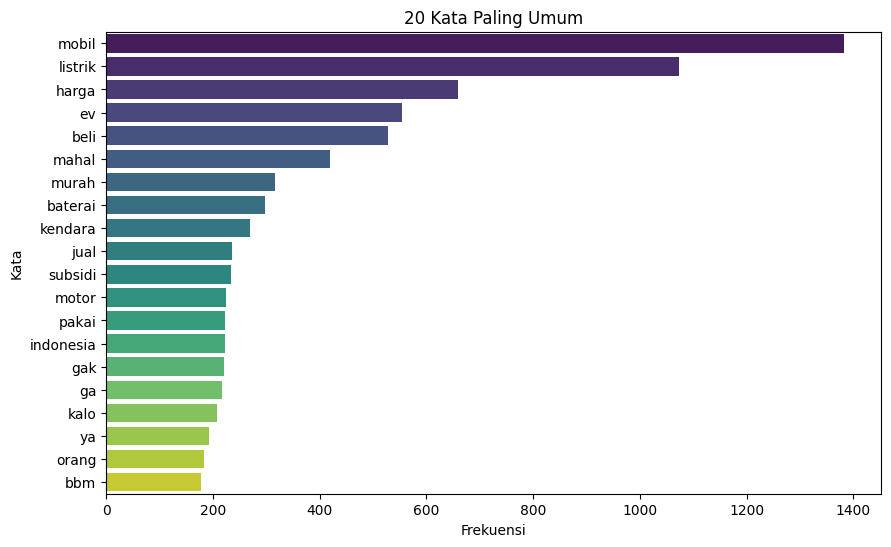

In [ ]:
# Analisis Kata Paling Umum
from collections import Counter

# Gabungkan semua kata dari kolom 'Cleaned Comment' menjadi satu string
all_words = ' '.join(data['Cleaned Comment'].astype(str).tolist())

# Menghitung frekuensi kata
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(20)

# Membuat DataFrame untuk visualisasi
common_words_df = pd.DataFrame(common_words, columns=['Kata', 'Frekuensi'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='Kata', data=common_words_df, palette='viridis')
plt.title("20 Kata Paling Umum")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()